**Tarea: Exploración y Construcción de una Red Neuronal Convolucional**

**Objetivo:** Esta tarea tiene como objetivo principal familiarizarlos con el manejo y análisis de datos en un contexto de aprendizaje profundo, específicamente utilizando redes neuronales convolucionales (CNN). Además, se enfoca en el desarrollo de habilidades críticas para identificar y solucionar problemas en la arquitectura de una red neuronal.

**Pasos a Seguir:**

1. **Análisis Preliminar de los Datos:**
   - **Identificación de Clases**: Investiguen cuántas clases diferentes están presentes en el conjunto de datos, será necesario para poder construir la arquitectura de la red.

   - **Balance de Datos**: Determinen si los datos están balanceados entre estas clases. ¿Hay una cantidad similar de ejemplos para cada clase?
   ¿Tienen el mismo tamaño todas las imagens?

   - **Exploración de Canales de Color**: Examinen los canales de color de las imágenes. ¿Están en RGB, escala de grises, o algún otro formato?

2. **Revisión y Corrección del Código:**
   - **Lectura Detenida del Código**: Dediquen tiempo a leer cuidadosamente el código proporcionado. Noten que hay partes incompletas o errores que deberán ser capazes de identificar.

   - **Implementación de Soluciones**: Basándose en los comentarios y en su comprensión del problema, completarán las partes faltantes del código.

3. **Tareas Específicas en la Arquitectura de la Red:**
   - **Mantenimiento de la Arquitectura Base**: La evaluación se centrará en si son capaces de completar correctamente la arquitectura de la red comparada con la solución.
   - **Ajuste de la Arquitectura**: Aunque no necesitarán manejar hiperparámetros de entrenamiento, sí deberán ajustar aspectos de la arquitectura de la red. Esto incluye calcular las dimensiones correctas en las diferentes capas para asegurarse de que la red esté bien configurada.

   - **Identificación de Transformaciones de Datos**: Tendrán que indentificar tres transformaciones que se deben aplicar a los datos para que el modelo funcione correctamente. Estas transformaciones pueden estar relacionadas con el preprocesamiento o la mejora de los datos.

**Evaluación:**

La evaluación se basará en la correcta implementación de la arquitectura de la red, la adecuada identificación y solución de los errores en el código, y la implementación efectiva de las transformaciones de datos necesarias.

In [3]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split


Si vamos trabajar con imagens blanco y negro, y que además de esto tienen distintos tamaños, es importante hacer cierto procesamiento de imagens antes de transformar en vectores y pasar a la red.

### hint 1: transforms.Grayscale les puede servir
### hint 2: $ 𝚽(mu, sigma) $
### hint 3: Si las imagens son de tamaños distintos, podrá la red procesarla? Que debemos hacer? (100, 100) funcionará bien, usenló como tamaño!!

In [4]:
def load_and_split_dataset(data_dir, batch_size=128, train_split=0.8, seed=42):

    transform = transforms.Compose([
         #Que transformaciones faltan acá?
        #transformación 1
        # transformación 2
        transforms.ToTensor(),
        # última transformación
       
    ])

    dataset = datasets.ImageFolder(root=data_dir, transform=transform)

    train_size = int(train_split * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset= random_split(dataset, [train_size, test_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader


In [ ]:
data_dir = 'dataset_digits'  # Replace with your dataset's path
train_loader, test_loader = load_and_split_dataset(data_dir)


Para calcular la dimensión de salida de una capa convolucional en una red neuronal, puedes usar la siguiente fórmula:

$ \text{Dimensión de salida} = \left\lfloor \frac{\text{Dimensión de entrada} - \text{Kernel} + 2 \times \text{Padding}}{\text{Stride}} \right\rfloor + 1 $

Donde:
- **Dimensión de entrada** es el tamaño (ancho o alto) de la imagen o mapa de características de entrada.
- **Kernel** es el tamaño del kernel (o filtro) que estás utilizando.
- **Stride** es el paso con el que se mueve el filtro sobre la imagen.
- **Padding** es la cantidad de relleno que se añade alrededor de la entrada.
- **Output Channel** es la cantidad de filtros que vamos crear.

Esta fórmula se aplica tanto para el ancho como para el alto de la imagen o mapa de características de entrada, suponiendo que el stride y el padding son iguales en ambas dimensiones.

Por ejemplo, si tienes una entrada de 32x32 (ancho x alto), un kernel de tamaño 3, un stride de 1 y un padding de 0, la dimensión de salida sería:

$ \text{Dimensión de salida} = \left\lfloor \frac{32 - 3 + 2 \times 0}{1} \right\rfloor + 1 = 30 $

Así que obtendrías una salida de 30x30xOutput Channel.


Recuerda que esta fórmula asume que estás trabajando con imágenes cuadradas y que el stride y el padding son iguales en ambas dimensiones. En casos más complejos, tendrías que aplicar la fórmula por separado para cada dimensión.

Lo mismo será valido para el Max Pooling, pero acá debemos usar
$ \text{Dimensión de salida} = \left\lfloor \frac{inputSize - kernel }{stride} \right\rfloor +1 $

Así que por ejemplo, si tenemos que la salida anterior es 30x30, kernel = 2, stride = 2

$ \text{Dimensión de salida} = \left\lfloor \frac{30 - 2 }{2} \right\rfloor +1 = 15$ como para nuestro caso la imagen tiene dimensiones cuadradas 15x15xOutput Channel esto seria la dimensión de salida.

 .

Así que por ejemplo:

Sea el vector de entrada con 10x10 (ancho x alto) y 3 canales de color,
si tenemos una convolución que retorna 6 filtros, con tamaño de kernel =3x3, stride=1, padding =0

$ \text{Dimensión de salida} = \left\lfloor \frac{10 - 3 + 2 \times 0}{1} \right\rfloor + 1 = 8 $ dimensión total = 8 x 8 x 6

si aplicamos un Max pooling de kernel=2, stride=2

$ \text{Dimensión de salida} = \left\lfloor \frac{8 - 2 }{2} \right\rfloor +1 = 4$ dimensión total = 4 x 4 x 6


Esto nos va servir para calcular correctamente la dimensión de la capa feedfoward, que debe ser igual a la dimensión de salida de la última capa convolucional.

In [ ]:
import torch
import torch.nn as nn

class AlexNetModified(nn.Module):
    def __init__(self, num_classes: int = 1000, dropout: float = 0.5) -> None:
        super().__init__()

        self.num_classes = num_classes

        self.features = nn.Sequential(

            # Existe um erro no primero bloque convolucional, imagens blanco y negro tienen la misma cantidad de canales que una imagen rgb?
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=9, stride=3, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            nn.Conv2d(in_channels=32, out_channels=96, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            # Acá falta una capa convolucional con kernel_size=3, padding=1, in_channels=?, out_channels=?
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=192, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

        )
        # Que valor deveria venir en dimension_capa_fully_connected?
        dimension_capa_fully_connected = None
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
          
            nn.Linear(dimension_capa_fully_connected, int(512)),

            # Ahora es necesario activar nuestra nn.Linear,
            # agregar dropout,
            # agregar outra fully connected con valores de entrada 512, y 512 de salida
            # aplicar otra ReLU a la capa creada, y por fin una capa fully connected(Linear) para predicir las clases

        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


# Si el código abajo funciona, provavelmente lograrón el 7.

In [ ]:
import torch

def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        total_train_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            print('1 batch')
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)

        # Validation Phase
        model.eval()
        total_valid_loss = 0
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_valid_loss += loss.item()

        avg_valid_loss = total_valid_loss / len(valid_loader)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_valid_loss:.4f}')

    return model


In [ ]:

model = AlexNetModified()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trained_model = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=5)


1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
Epoch 1/5, Train Loss: 2.4221, Validation Loss: 1.5833
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1 batch
1

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


def predict_and_evaluate(model, data_loader, device):
    model.eval()
    predictions, labels = [], []

    with torch.no_grad():
        for inputs, true_labels in data_loader:
            inputs = inputs.to(device)
            true_labels = true_labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            predictions.extend(predicted.view(-1).cpu().numpy())
            labels.extend(true_labels.view(-1).cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')

    return predictions, labels, accuracy, precision, recall, f1


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = trained_model.to(device)  # Your trained model

# Get predictions and metrics
predictions, labels, accuracy, precision, recall, f1 = predict_and_evaluate(model, test_loader, device)
# Print metrics
print(f'Accuracy for real model: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')



Accuracy for real model: 0.9425, Precision: 0.9463, Recall: 0.9425, F1-Score: 0.9427
Accuracy for play model: 0.8512, Precision: 0.8589, Recall: 0.8512, F1-Score: 0.8513


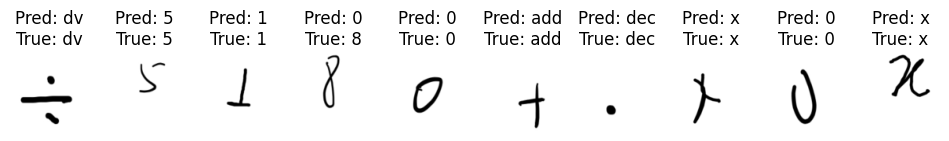

In [ ]:
def show_predictions(data_loader, predictions, labels, class_names, num_images=10):
    plt.figure(figsize=(12, 8))

    for i in range(num_images):
        inputs, _ = next(iter(data_loader))
        plt.subplot(1, num_images, i + 1)
        plt.imshow(inputs[i][0], cmap='gray')  # assuming grayscale images
        plt.title(f'Pred: {class_names[predictions[i]]}\nTrue: {class_names[labels[i]]}')
        plt.axis('off')

    plt.show()

# Assuming you have a list of class names
class_names = ['0', '1', '2', '3', '4', '5', '6', '7','8', '9', 'add', 'dec', 'dv', 'eq', 'mul', 'sub', 'x', 'y', 'z']

# Display some predictions
show_predictions(test_loader, predictions, labels, class_names)
